In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('../content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ../content/drive


In [18]:
''' import libraries '''

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import transforms  # 1 batch = (1, 784)
from torchvision.datasets import MNIST
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
from matplotlib import pyplot as plt
import numpy as np
from torchsummary import summary

In [ ]:
''' data load '''
batch_size = 50
download_root = 'data'
# Normalize data with mean=0.5, std=1.0
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

# 60000 if train=True, 60000. else 10000.
train_data = MNIST(download_root, transform=mnist_transform, train=True, download=True)
test_data = MNIST(download_root, transform=mnist_transform, train=False, download=True)

# 위 데이터를 batch size로 나눴구나
batch_size = 50
# 938 = int(60000/batch_size)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# if you wanna pick one sample
# example_mini_batch_img, example_mini_batch_label  = next(iter(train_loader))
# print(example_mini_batch_img.shape)  # torch.Size([batch_size, 1, 28, 28])

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
''' Build Network, 6 layer DNN '''
class DNN_Net(nn.Module):
    def __init__(self):
        super(DNN_Net, self).__init__()
        # weight, bias 따로 설정 안해도 됨?
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)  # output = 10

    def forward(self, x):
        x = x.float()
        h1 = F.relu(self.fc1(x.view(-1, 784)))  # push reshape input
        h2 = F.relu(self.fc2(h1))
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        h5 = F.relu(self.fc5(h4))
        output = F.log_softmax(self.fc6(h5), dim=1)  # softmax

        return output

In [ ]:
''' hyper parameters '''
# total_batch_num = int(len(train_data) / batch_size)
epochs = 20
lr = 0.001
momentum = 0.5
print_interval = 100
model = DNN_Net()  # train 코드에서 모듈 model 호출될 때마다 forward 자동 실행!
optimizer = optim.Adam(model.parameters(), lr=lr)

In [22]:
summary(model,(50, 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 256]         131,328
            Linear-3                  [-1, 128]          32,896
            Linear-4                   [-1, 64]           8,256
            Linear-5                   [-1, 32]           2,080
            Linear-6                   [-1, 10]             330
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.15
Forward/backward pass size (MB): 0.01
Params size (MB): 2.20
Estimated Total Size (MB): 2.36
----------------------------------------------------------------


train_batch_num:  1200
x.shape torch.Size([50, 1, 28, 28]) target.shape torch.Size([50])
60000
epoch: 0	batch Step: 0	Loss: 4.576	Accuracy: 6.000
epoch: 0	batch Step: 100	Loss: 0.970	Accuracy: 80.000
epoch: 0	batch Step: 200	Loss: 1.282	Accuracy: 74.000
epoch: 0	batch Step: 300	Loss: 1.084	Accuracy: 86.000
epoch: 0	batch Step: 400	Loss: 1.004	Accuracy: 84.000
epoch: 0	batch Step: 500	Loss: 0.685	Accuracy: 84.000
epoch: 0	batch Step: 600	Loss: 0.828	Accuracy: 82.000
epoch: 0	batch Step: 700	Loss: 0.262	Accuracy: 92.000
epoch: 0	batch Step: 800	Loss: 0.279	Accuracy: 96.000
epoch: 0	batch Step: 900	Loss: 0.562	Accuracy: 92.000
epoch: 0	batch Step: 1000	Loss: 0.258	Accuracy: 96.000
epoch: 0	batch Step: 1100	Loss: 0.422	Accuracy: 90.000
train_batch_num:  1200
x.shape torch.Size([50, 1, 28, 28]) target.shape torch.Size([50])
60000
epoch: 1	batch Step: 0	Loss: 0.430	Accuracy: 94.000
epoch: 1	batch Step: 100	Loss: 1.110	Accuracy: 88.000
epoch: 1	batch Step: 200	Loss: 0.265	Accuracy: 96.000
epo

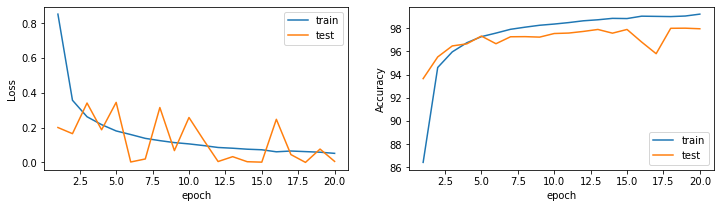

In [ ]:
# 통일성 있게 코드 짜자.
train_epoch_loss = []
train_epoch_acc = []
test_epoch_loss = []
test_epoch_acc = []

for epoch in range(epochs):
    
    ''' Train '''
    model.train()
    train_batch_loss = []
    train_batch_acc = []
    train_batch_num = len(train_loader)
    print("train_batch_num: ", train_batch_num)
    for batch_idx, (x, target) in enumerate(train_loader):
        if batch_idx == 0:
            print('x.shape', x.shape, 'target.shape', target.shape)  # torch.Size([64, 1, 28, 28]) torch.Size([64])
            print(len(train_loader.dataset))  # 60000

        # if batch_idx == 200:
        #     break

        x, target = Variable(x), Variable(target)
        optimizer.zero_grad()
        output = model(x)
        loss = F.nll_loss(output, target)
        loss.backward()    # calc gradients
        train_batch_loss.append(loss.item()/batch_size*100) # from tensor -> get value loss.item() or loss.data
        optimizer.step()   # update gradients
        prediction = output.argmax(dim=1, keepdims=True)
        accuracy = torch.true_divide(prediction.eq(target.view_as(prediction)).sum().data, batch_size)*100
        train_batch_acc.append(accuracy)
        if batch_idx % print_interval == 0:
            print('epoch: {}\tbatch Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(
                    epoch, batch_idx, train_batch_loss[batch_idx], train_batch_acc[batch_idx]))

    train_epoch_loss.append(np.sum(train_batch_loss)/train_batch_num)
    train_epoch_acc.append(np.sum(train_batch_acc)/train_batch_num)



    ''' Test '''
    model.eval()
    test_batch_loss = []
    test_batch_acc = []
    test_batch_num = len(test_loader)

    with torch.no_grad():
        for batch_idx, (x, target) in enumerate(test_loader):

            # if batch_idx == 10:
            #     break

            x, target = Variable(x), Variable(target)
            output = model(x)
            test_batch_loss.append(loss.item()/batch_size*100)
            prediction = output.argmax(dim=1, keepdims=True)
            accuracy = torch.true_divide(prediction.eq(target.view_as(prediction)).sum().data, batch_size)*100
            test_batch_acc.append(accuracy)


    test_epoch_loss.append(np.sum(test_batch_loss)/test_batch_num)
    test_epoch_acc.append(np.sum(test_batch_acc)/test_batch_num)



''' save results to numpy '''
train_test_result = (train_epoch_loss, test_epoch_loss, train_epoch_acc, test_epoch_acc)
np.save("result.npy", train_test_result)

print("==================================")
print("train_epoch_loss:", train_epoch_loss)
print("test_epoch_loss:", test_epoch_loss)
print("train_epoch_acc", train_epoch_acc)
print("test_epoch_acc", train_epoch_acc)
print("==================================")
x = np.arange(start=1, stop=len(train_epoch_loss)+1, step=1)

fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, train_epoch_loss, label='train')
plt.plot(x, test_epoch_loss, label='test')
ax1.legend()
ax1.set(ylabel="Loss", xlabel='epoch')

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, train_epoch_acc, label='train')
plt.plot(x, test_epoch_acc, label='test')
ax2.legend()
ax2.set(ylabel="Accuracy", xlabel='epoch')

plt.show()

torch.save(model, './model.pt')